In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('df_modif.csv', encoding='latin-1', sep=',')

In [4]:
df = pd.DataFrame(data)

In [5]:
media = df['RU'].mean()

# Rellena los NaN con la media
df['RU'].fillna(media, inplace=True)

In [6]:
df.isnull().sum()

estacion    0
Datetime    0
DV          0
HR          0
P           0
PB          0
RS          0
RU          0
TEMP        0
VV          0
BEN         0
CH4         0
CO          0
EBE         0
NMHC        0
NO          0
NO2         0
NOX         0
O3          0
PM10        0
PM25        0
SO2         0
TCH         0
TOL         0
dtype: int64

### NORMALIZAR

In [7]:
# quitamos la variable del tipo object (string)
variables = df.drop(["Datetime"], axis=1, inplace=False)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()

In [10]:
df_transformed = scaler.fit_transform(variables._get_numeric_data())

### DIVISIÓN DATOS

In [11]:
X = df.iloc[:,2:10]
y = df.iloc[:,10:24]

In [12]:
# Importamos el módulo de StratifiedKfold
from sklearn.model_selection import StratifiedKFold
# Importamos el módulo de cross_val_score
from sklearn.model_selection import cross_val_predict
# Importamos el módulo para realizar la partición entre train y test
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### MODELOS

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import median_absolute_error

modelo_arbol = DecisionTreeRegressor(max_depth=15)  # Puedes ajustar la profundidad máxima según tus necesidades

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados MAE

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_arbol.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_arbol.predict(X)  # Realiza predicciones
    
    # Calcula el Error Absoluto Mediano (MAE) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado MAE para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.013734896943852104
MedAE para CH4: 0.007500000000000062
MedAE para CO: 0.014403935185185207
MedAE para EBE: 0.03047138047138051
MedAE para NMHC: 2.7755575615628914e-17
MedAE para NO: 1.0149253731343282
MedAE para NO2: 1.9151515151515142
MedAE para NOX: 3.1428571428571423
MedAE para O3: 1.593333333333348
MedAE para PM10: 1.1999999999999993
MedAE para PM25: 0.47463768115942084
MedAE para SO2: 0.4660493827160499
MedAE para TCH: 0.007073170731707316
MedAE para TOL: 0.09681372549019618


In [14]:
from sklearn.tree import DecisionTreeRegressor

# Crear el modelo de Árbol de Decisión con la profundidad máxima deseada
modelo_arbol = DecisionTreeRegressor(max_depth=15)

# Entrenar el modelo para cada variable objetivo y calcular la importancia de características
importancia_caracteristicas = {}

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_arbol.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    
    # Obtener la importancia de características
    importancias = modelo_arbol.feature_importances_

    # Asociar las importancias con los nombres de las características
    caracteristicas = X.columns  # Asegúrate de reemplazarlo con el nombre de tus características
    importancia_caracteristicas[variable_objetivo] = dict(zip(caracteristicas, importancias))

# Imprimir las características más importantes para cada variable objetivo
for variable_objetivo, importancias in importancia_caracteristicas.items():
    print(f'Variable objetivo: {variable_objetivo}')
    importancias_ordenadas = sorted(importancias.items(), key=lambda x: x[1], reverse=True)
    for caracteristica, importancia in importancias_ordenadas:
        print(f'{caracteristica}: {importancia}')
    print()

Variable objetivo: BEN
VV: 0.432665414696729
TEMP: 0.21955304513181198
PB: 0.08232286704204504
RU: 0.07557119605452964
RS: 0.06536713500264392
HR: 0.05545465338761439
DV: 0.05142737229300605
P: 0.01763831639162012

Variable objetivo: CH4
RU: 0.4857036152815465
DV: 0.1089155228108388
RS: 0.09762723747945168
VV: 0.0935037440814004
PB: 0.07851564134819804
TEMP: 0.06408519475450983
HR: 0.03990265061940074
P: 0.031746393624654014

Variable objetivo: CO
VV: 0.4519126642741074
TEMP: 0.16877858111588226
PB: 0.09063437697451443
HR: 0.08343911865101966
DV: 0.07416032494485766
RS: 0.065232235220173
RU: 0.04054058252192104
P: 0.02530211629752459

Variable objetivo: EBE
TEMP: 0.24529154990887514
RS: 0.21257650098353983
RU: 0.18297248603074887
VV: 0.1380012942455331
HR: 0.12226870801369855
DV: 0.0635632297077764
PB: 0.02582549935499557
P: 0.00950073175483256

Variable objetivo: NMHC
RU: 0.21056140419481992
RS: 0.1909642505727418
VV: 0.16834130808723968
DV: 0.12650739882713105
PB: 0.11889977454160988

In [14]:
import matplotlib.pyplot as plt

In [17]:
profundidades_maximas = [5, 10, 15, 20, 25]

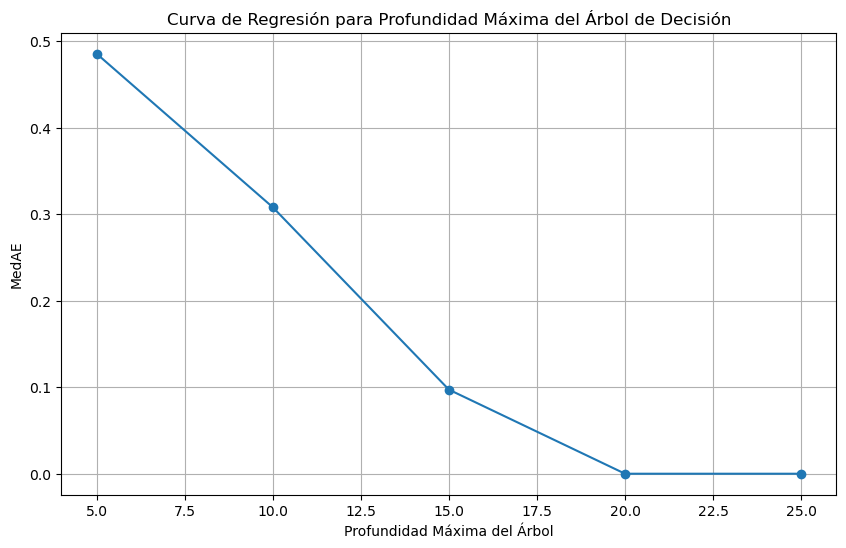

In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import median_absolute_error

# Valores de profundidad máxima del árbol que deseas probar
profundidades_maximas = [5, 10, 15, 20, 25]

# Lista para almacenar los resultados MAE para cada valor de profundidad máxima
mae_scores = []

for max_depth in profundidades_maximas:
    modelo_arbol = DecisionTreeRegressor(max_depth=max_depth)
    
    # Entrenar el modelo para una variable objetivo (puedes adaptar esto a tus datos)
    y_actual = y[variable_objetivo]  # Reemplaza 'variable_objetivo' con el nombre de tu variable objetivo actual
    modelo_arbol.fit(X, y_actual)  # Entrena el modelo
    
    # Realizar predicciones
    y_pred = modelo_arbol.predict(X)
    
    # Calcular el Error Absoluto Mediano (MAE)
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores.append(mae)

# Crear la curva de regresión
plt.figure(figsize=(10, 6))
plt.plot(profundidades_maximas, mae_scores, marker='o', linestyle='-')
plt.title('Curva de Regresión para Profundidad Máxima del Árbol de Decisión')
plt.xlabel('Profundidad Máxima del Árbol')
plt.ylabel('MedAE')
plt.grid(True)

# Mostrar la curva de regresión
plt.show()

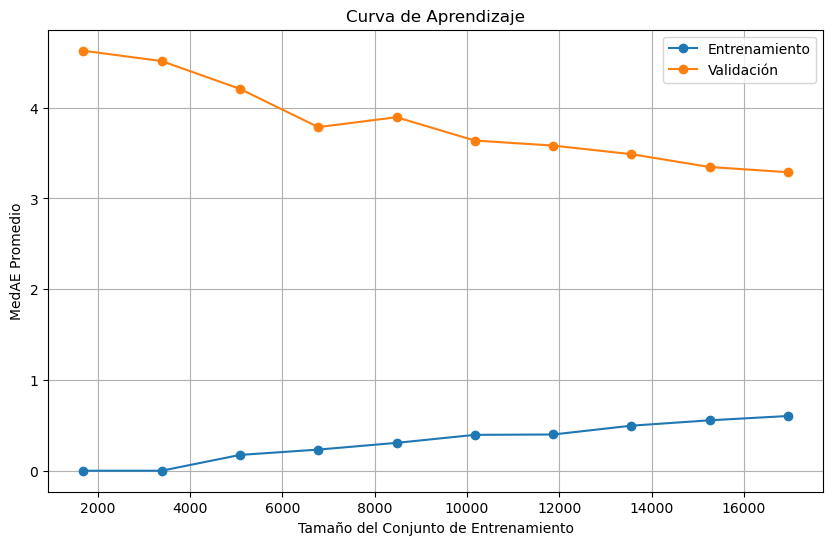

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import learning_curve

# Define el modelo DecisionTreeRegressor con la profundidad máxima deseada
modelo_arbol = DecisionTreeRegressor(max_depth=15)

# Define tamaños de conjunto de entrenamiento que deseas probar
tamaños_entrenamiento = np.linspace(0.1, 1.0, 10)  # Aquí puedes ajustar los tamaños deseados

# Crea una función para calcular el MAE
def calcular_mae(modelo, X, y):
    y_pred = modelo.predict(X)
    return median_absolute_error(y, y_pred)

# Calcula las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    modelo_arbol, X, y, train_sizes=tamaños_entrenamiento, cv=5, scoring=calcular_mae)

# Calcula el MAE promedio en entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Crea la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Entrenamiento')
plt.plot(train_sizes, val_scores_mean, marker='o', label='Validación')
plt.title('Curva de Aprendizaje')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('MedAE Promedio')
plt.legend()
plt.grid(True)

# Muestra la curva de aprendizaje
plt.show()

MedAE para BEN: 0.01373489694385191
MedAE para CH4: 0.007500000000000062
MedAE para CO: 0.014285714285714346
MedAE para EBE: 0.030471380471380483
MedAE para NMHC: 2.7755575615628914e-17
MedAE para NO: 1.0
MedAE para NO2: 1.9151515151515142
MedAE para NOX: 3.1428571428571423
MedAE para O3: 1.5922222222222189
MedAE para PM10: 1.1999999999999993
MedAE para PM25: 0.4729729729729728
MedAE para SO2: 0.46666666666666656
MedAE para TCH: 0.007073170731707316
MedAE para TOL: 0.09705882352941175


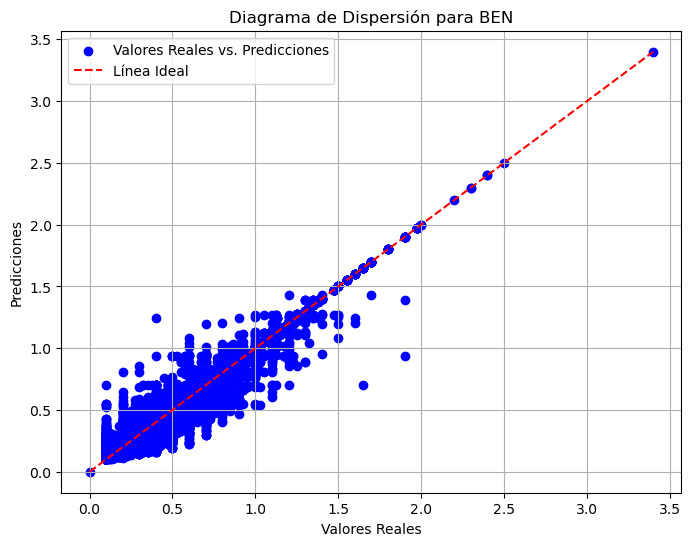

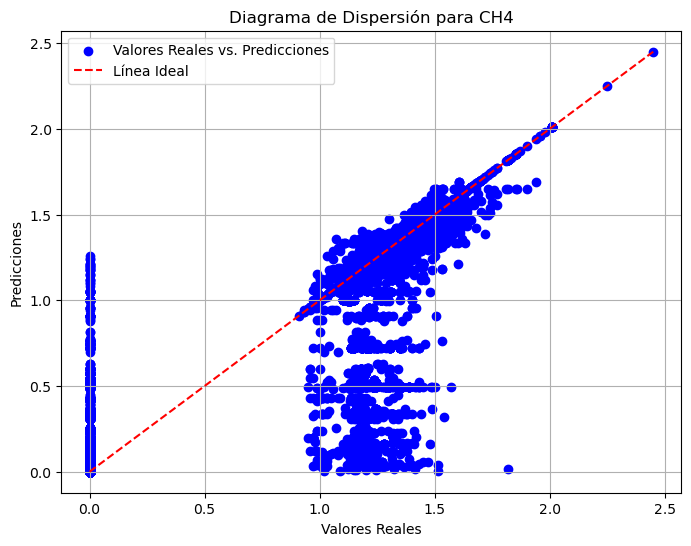

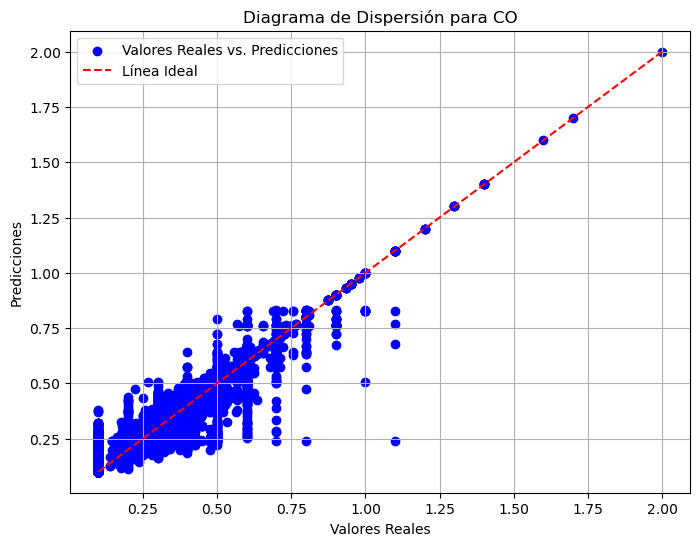

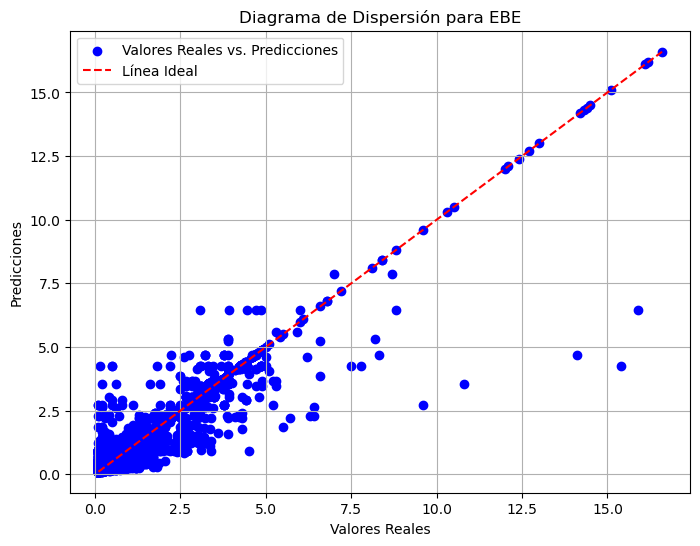

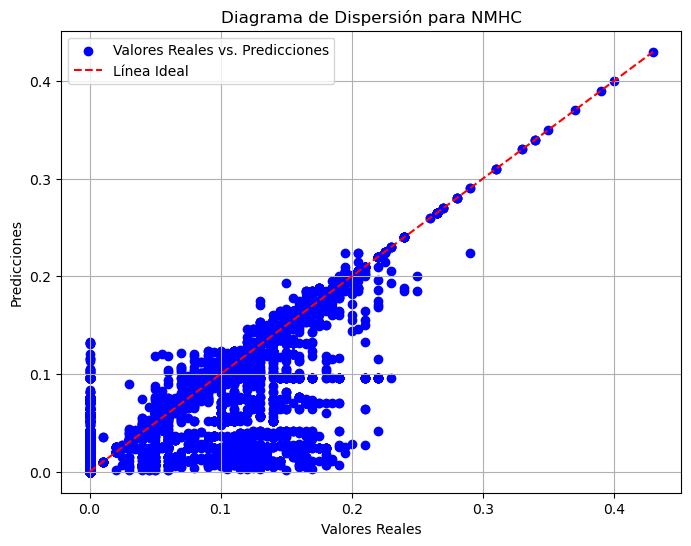

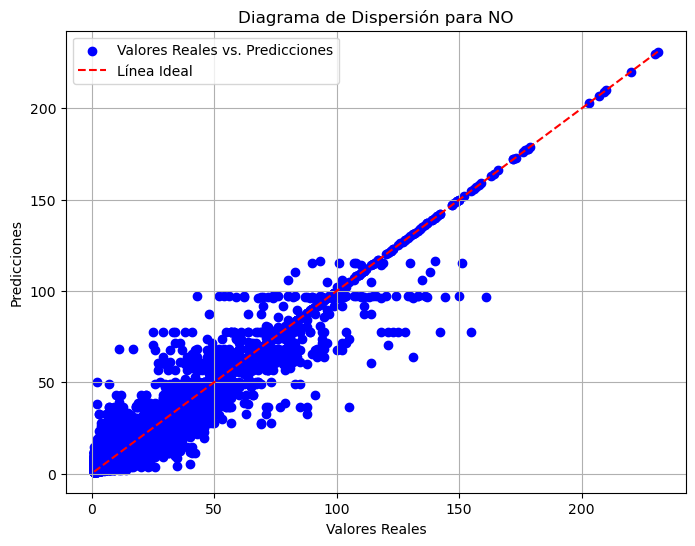

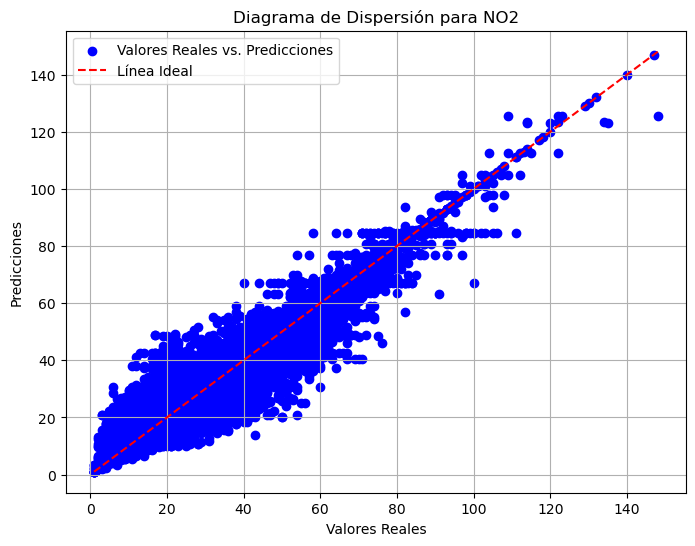

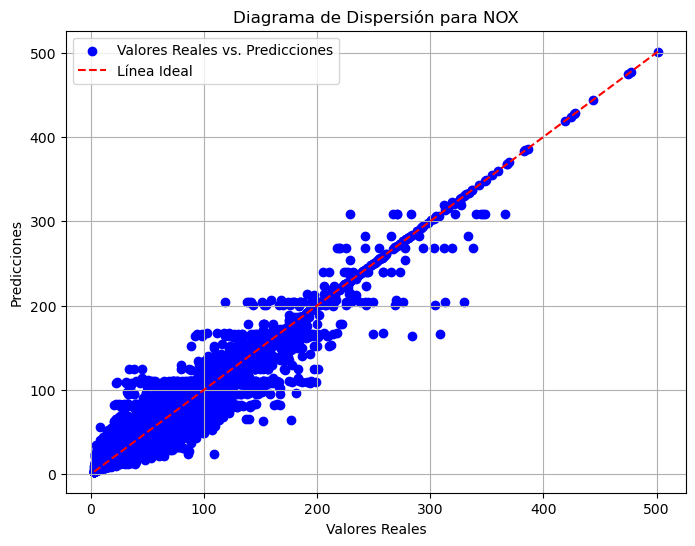

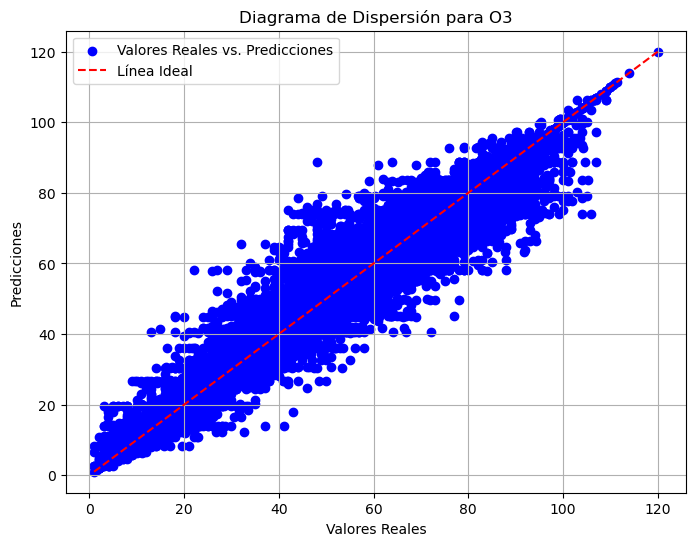

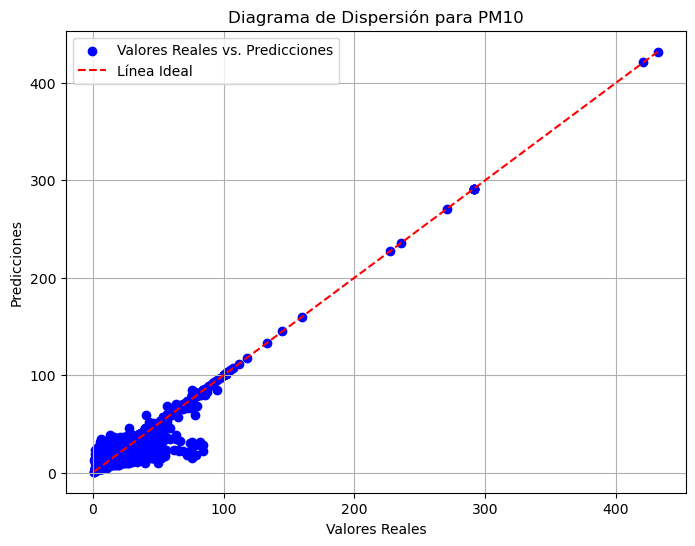

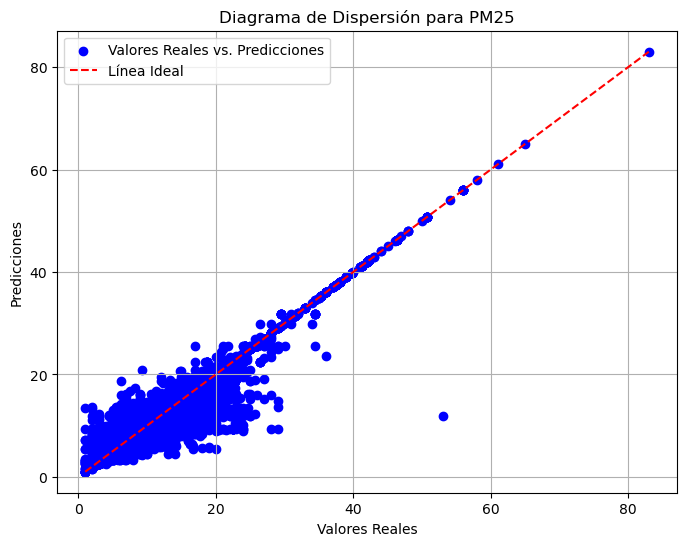

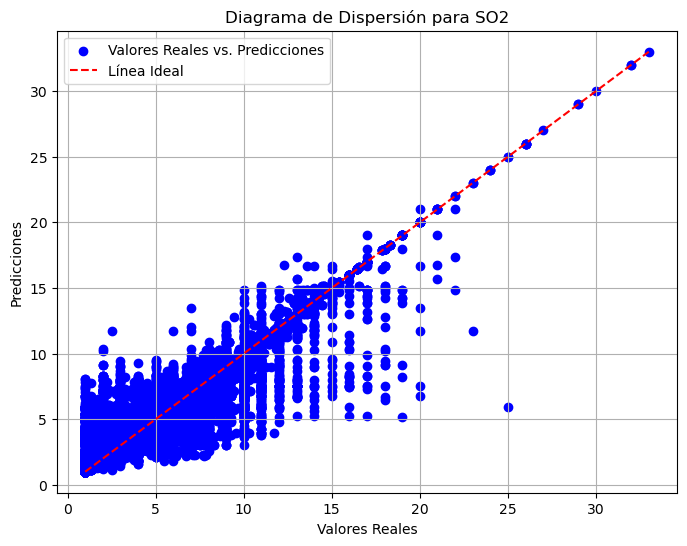

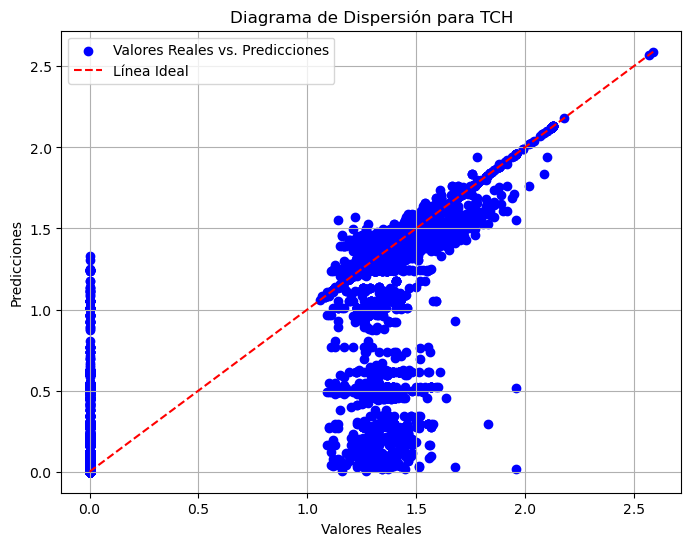

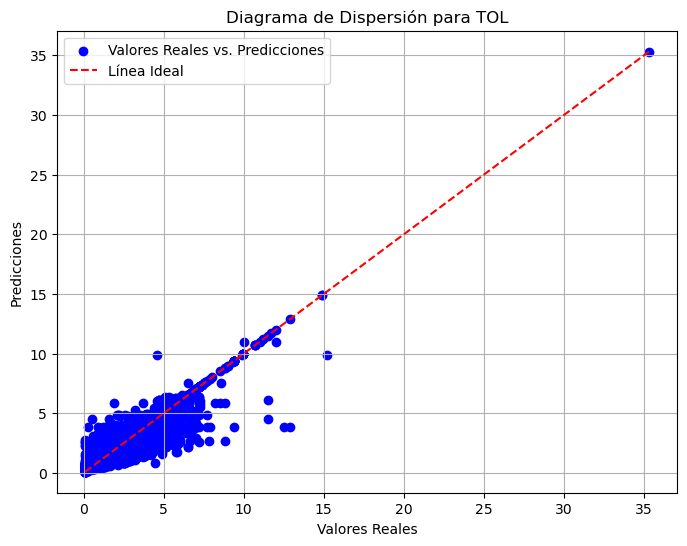

In [34]:

# Define el modelo DecisionTreeRegressor con la profundidad máxima deseada
modelo_arbol = DecisionTreeRegressor(max_depth=15)

# Diccionario para almacenar las predicciones y los valores reales
predicciones_vs_reales = {}

# Itera sobre cada variable objetivo
for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_arbol.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_arbol.predict(X)  # Realiza predicciones
    
    # Almacena las predicciones y los valores reales en el diccionario
    predicciones_vs_reales[variable_objetivo] = {
        'y_actual': y_actual,
        'y_pred': y_pred
    }

    # Calcula el Error Absoluto Mediano (MAE) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)

    # Imprime el resultado MAE para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

# Crea los diagramas de dispersión
for variable_objetivo, datos in predicciones_vs_reales.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(datos['y_actual'], datos['y_pred'], c='blue', marker='o', label='Valores Reales vs. Predicciones')
    plt.plot([min(datos['y_actual']), max(datos['y_actual'])], [min(datos['y_actual']), max(datos['y_actual'])], linestyle='--', color='red', label='Línea Ideal')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Diagrama de Dispersión para {variable_objetivo}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
modelo_lineal_multiple = LinearRegression()  # Puedes ajustar la profundidad máxima según tus necesidades

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_lineal_multiple.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_lineal_multiple.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.10007599730227668
MedAE para CH4: 0.5046033444093969
MedAE para CO: 0.05425024067583495
MedAE para EBE: 0.24620235347367841
MedAE para NMHC: 0.04240982706776991
MedAE para NO: 6.116628343713046
MedAE para NO2: 7.998180444790989
MedAE para NOX: 16.41290020730321
MedAE para O3: 8.830267501635149
MedAE para PM10: 5.288079312428437
MedAE para PM25: 2.761904677042395
MedAE para SO2: 1.9834194170552557
MedAE para TCH: 0.5502514039351651
MedAE para TOL: 0.5951812463916355


In [16]:
from sklearn.linear_model import ElasticNet

In [17]:
enet_model = ElasticNet(alpha=0.5, l1_ratio=0.5, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    enet_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = enet_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.10711921871301122
MedAE para CH4: 0.5038040927675349
MedAE para CO: 0.06337880232891385
MedAE para EBE: 0.25983683882177855
MedAE para NMHC: 0.04246746431323421
MedAE para NO: 5.885771460173373
MedAE para NO2: 8.302921744158766
MedAE para NOX: 16.29621366608012
MedAE para O3: 9.344753325908414
MedAE para PM10: 5.346737842830754
MedAE para PM25: 2.794986291289149
MedAE para SO2: 1.963447224645602
MedAE para TCH: 0.5417195468080128
MedAE para TOL: 0.6347089469774915


In [18]:
from sklearn.neighbors import KNeighborsRegressor

modelo_knn = KNeighborsRegressor(n_neighbors=5)  # Puedes ajustar la profundidad máxima según tus necesidades

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_knn.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_knn.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.03500000000000003
MedAE para CH4: 0.0
MedAE para CO: 0.02999999999999997
MedAE para EBE: 0.05000000000000007
MedAE para NMHC: 0.0
MedAE para NO: 2.0
MedAE para NO2: 4.200000000000003
MedAE para NOX: 7.200000000000003
MedAE para O3: 3.4666666666666686
MedAE para PM10: 1.4333333333333336
MedAE para PM25: 0.4500000000000002
MedAE para SO2: 0.8
MedAE para TCH: 0.0
MedAE para TOL: 0.18000000000000016


In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    rf_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = rf_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.015250000000000263
MedAE para CH4: 0.012450000000000072
MedAE para CO: 0.011999999999999567
MedAE para EBE: 0.023166666666666752
MedAE para NMHC: 0.001550000000000093
MedAE para NO: 0.8999999999999999
MedAE para NO2: 1.7600000000000016
MedAE para NOX: 3.0799999999999983
MedAE para O3: 1.4653500000000008
MedAE para PM10: 0.6908333333333303
MedAE para PM25: 0.25
MedAE para SO2: 0.34166666666666723
MedAE para TCH: 0.0139375
MedAE para TOL: 0.07741666666666602


In [17]:
# Crear el modelo de Árbol de Decisión con la profundidad máxima deseada
rf_model = RandomForestRegressor(n_estimators=150, random_state=42)

# Entrenar el modelo para cada variable objetivo y calcular la importancia de características
importancia_caracteristicas = {}

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    rf_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    
    # Obtener la importancia de características
    importancias = rf_model.feature_importances_

    # Asociar las importancias con los nombres de las características
    caracteristicas = X.columns  # Asegúrate de reemplazarlo con el nombre de tus características
    importancia_caracteristicas[variable_objetivo] = dict(zip(caracteristicas, importancias))

# Imprimir las características más importantes para cada variable objetivo
for variable_objetivo, importancias in importancia_caracteristicas.items():
    print(f'Variable objetivo: {variable_objetivo}')
    importancias_ordenadas = sorted(importancias.items(), key=lambda x: x[1], reverse=True)
    for caracteristica, importancia in importancias_ordenadas:
        print(f'{caracteristica}: {importancia}')
    print()

Variable objetivo: BEN
VV: 0.41692017111659685
TEMP: 0.21505361522271202
PB: 0.0860143503349027
RS: 0.07014668788105798
RU: 0.06935150483440607
DV: 0.06413845578609859
HR: 0.06256847604715668
P: 0.015806738777069125

Variable objetivo: CH4
RU: 0.4232359841173802
RS: 0.11306073238501652
DV: 0.11272075967606668
VV: 0.0984481422303475
PB: 0.09102578414157936
TEMP: 0.08021677549226366
HR: 0.05301614902259109
P: 0.02827567293475505

Variable objetivo: CO
VV: 0.405891027146675
TEMP: 0.18812152989370187
HR: 0.10824012944843531
PB: 0.08717350670267882
RS: 0.07465879469494552
DV: 0.0717421823547406
RU: 0.04254335807805569
P: 0.021629471680767065

Variable objetivo: EBE
TEMP: 0.2585361866787322
RS: 0.19366046190949213
RU: 0.1608501938481838
VV: 0.12968587677813107
HR: 0.12719463506855386
DV: 0.06678119677106559
PB: 0.04155437392730956
P: 0.02173707501853188

Variable objetivo: NMHC
VV: 0.18337204514058958
RS: 0.1775929234768241
RU: 0.16700597762380343
DV: 0.1367398241650825
TEMP: 0.1164356749175

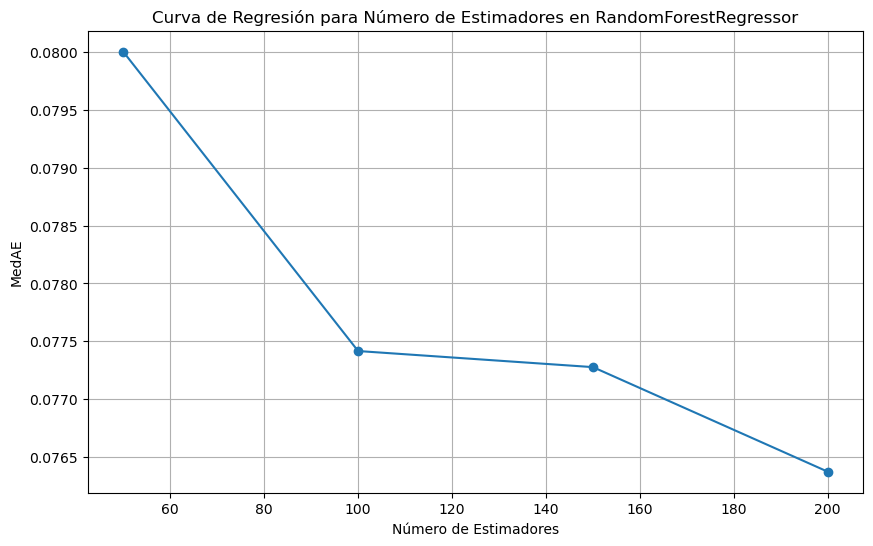

<Figure size 640x480 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error

# Valores de número de estimadores que deseas probar
num_estimadores = [50, 100, 150, 200]  # Reemplaza esto con tus valores

# Lista para almacenar los resultados de MedAE para cada número de estimadores
mae_scores = []

for n_estimators in num_estimadores:
    # Crea un modelo RandomForestRegressor con el número de estimadores actual
    rf_model = RandomForestRegressor(n_estimators=n_estimators, random_state=42)
    
    # Entrena el modelo para una variable objetivo (puedes adaptar esto a tus datos)
    y_actual = y[variable_objetivo]  # Reemplaza 'variable_objetivo' con el nombre de tu variable objetivo actual
    rf_model.fit(X, y_actual)  # Entrena el modelo
    
    # Realizar predicciones
    y_pred = rf_model.predict(X)
    
    # Calcular el MedAE
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores.append(mae)

# Crear la curva de regresión
plt.figure(figsize=(10, 6))
plt.plot(num_estimadores, mae_scores, marker='o', linestyle='-')
plt.title('Curva de Regresión para Número de Estimadores en RandomForestRegressor')
plt.xlabel('Número de Estimadores')
plt.ylabel('MedAE')
plt.grid(True)

# Mostrar la curva de regresión
plt.show()
plt.savefig('reg1.png', format='png', dpi=300, bbox_inches='tight')

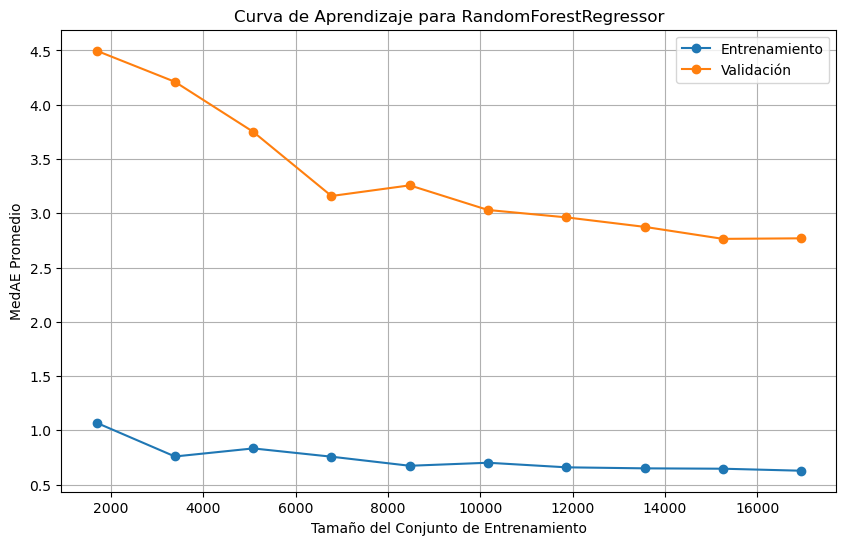

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import learning_curve

# Define el modelo RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Define los tamaños de conjunto de entrenamiento que deseas probar
tamaños_entrenamiento = np.linspace(0.1, 1.0, 10)  # Aquí puedes ajustar los tamaños deseados

# Crea una función para calcular el MedAE
def calcular_medae(modelo, X, y):
    y_pred = modelo.predict(X)
    return median_absolute_error(y, y_pred)

# Calcula las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    rf_model, X, y, train_sizes=tamaños_entrenamiento, cv=5, scoring=calcular_medae)

# Calcula el MedAE promedio en entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Crea la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Entrenamiento')
plt.plot(train_sizes, val_scores_mean, marker='o', label='Validación')
plt.title('Curva de Aprendizaje para RandomForestRegressor')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('MedAE Promedio')
plt.legend()
plt.grid(True)

# Muestra la curva de aprendizaje
plt.show()

MedAE para BEN: 0.015250000000000263
MedAE para CH4: 0.012450000000000072
MedAE para CO: 0.011999999999999567
MedAE para EBE: 0.023166666666666752
MedAE para NMHC: 0.001550000000000093
MedAE para NO: 0.8999999999999999
MedAE para NO2: 1.7600000000000016
MedAE para NOX: 3.0799999999999983
MedAE para O3: 1.4653500000000008
MedAE para PM10: 0.6908333333333303
MedAE para PM25: 0.25
MedAE para SO2: 0.34166666666666723
MedAE para TCH: 0.0139375
MedAE para TOL: 0.07741666666666602


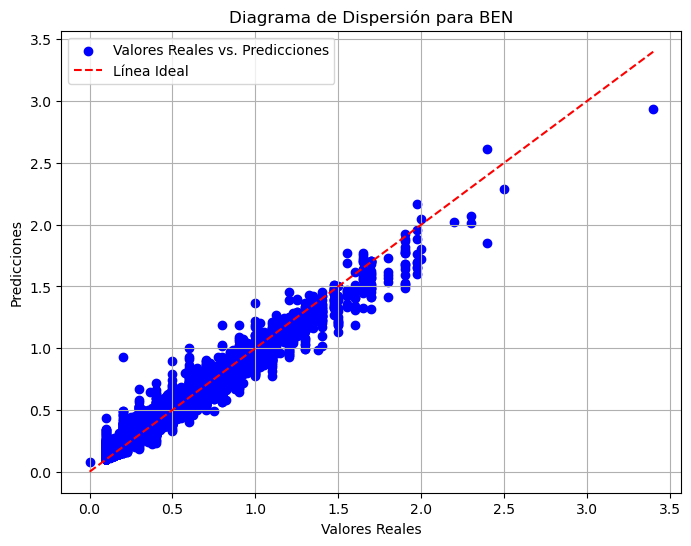

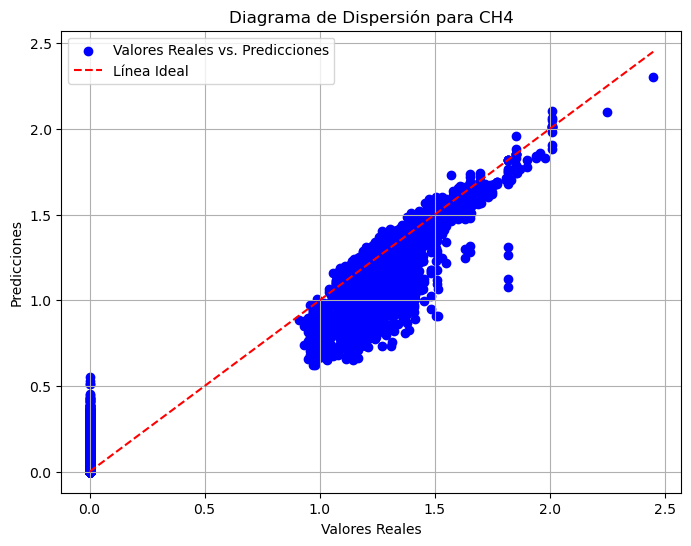

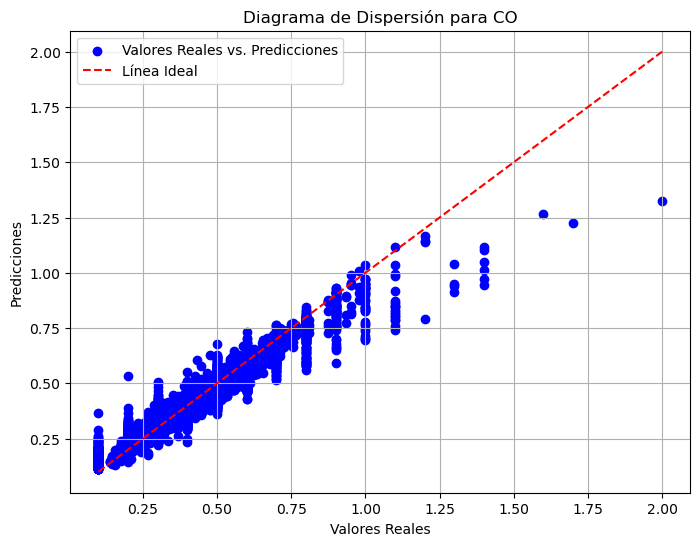

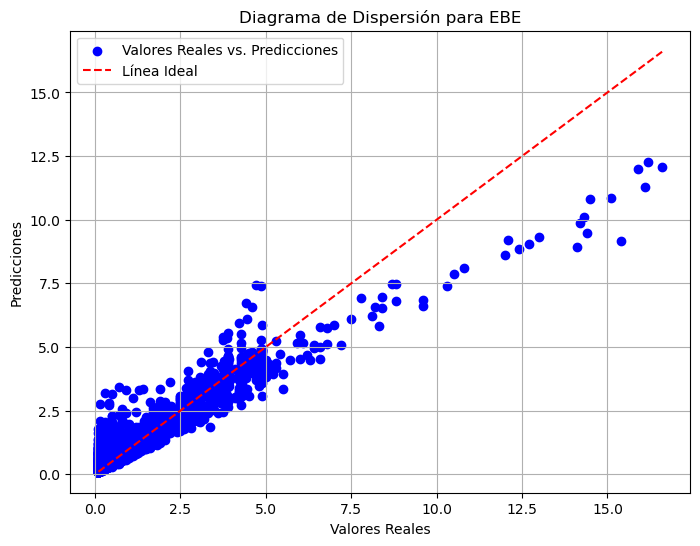

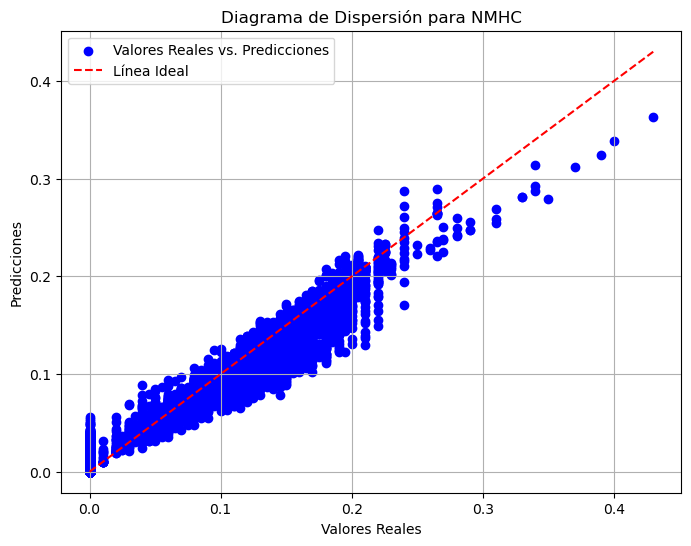

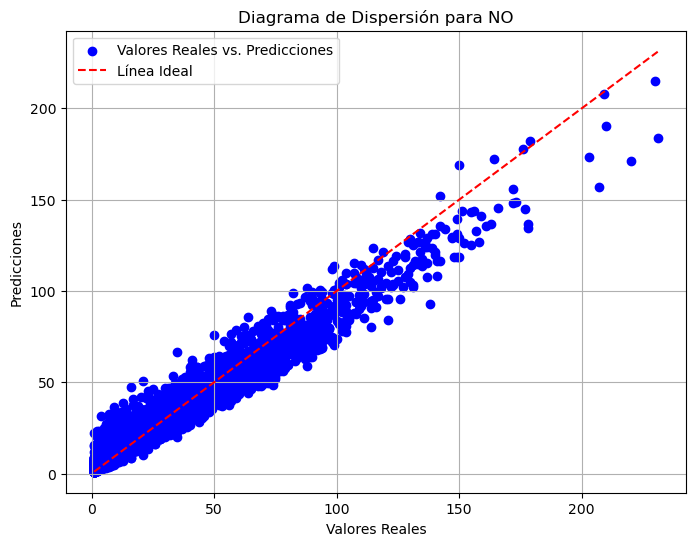

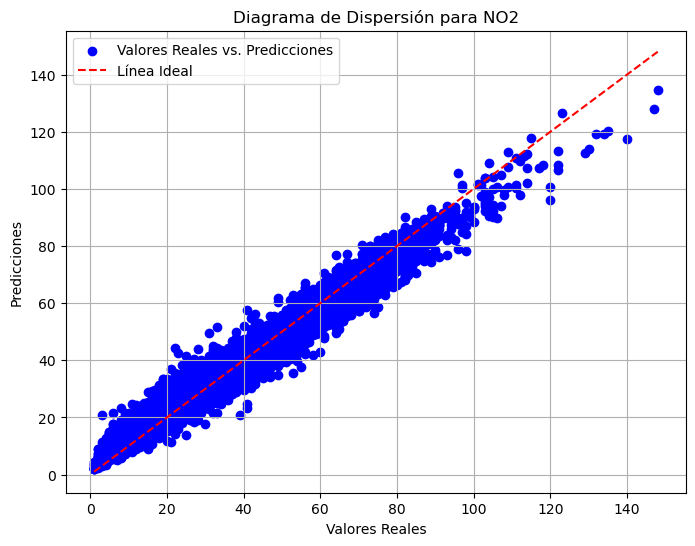

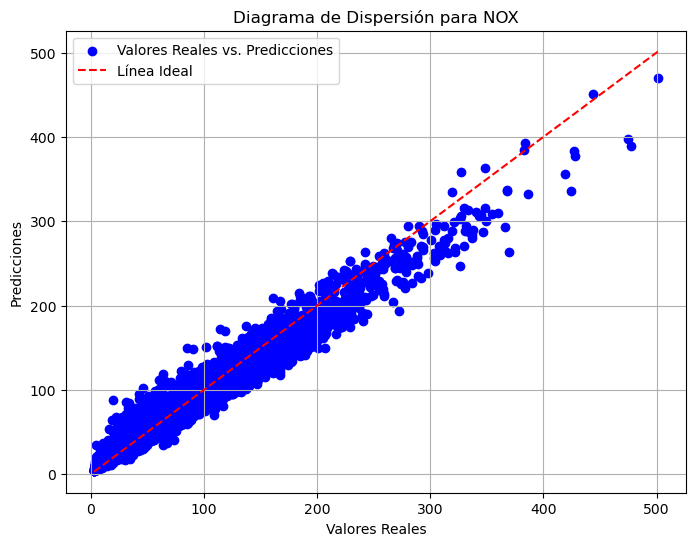

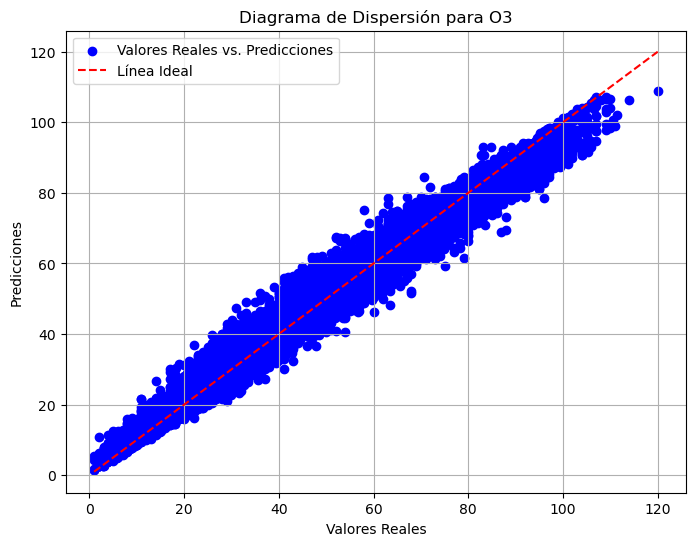

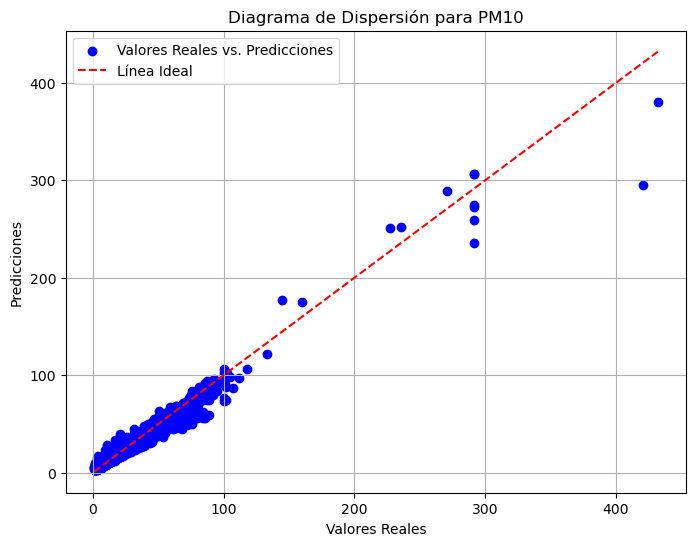

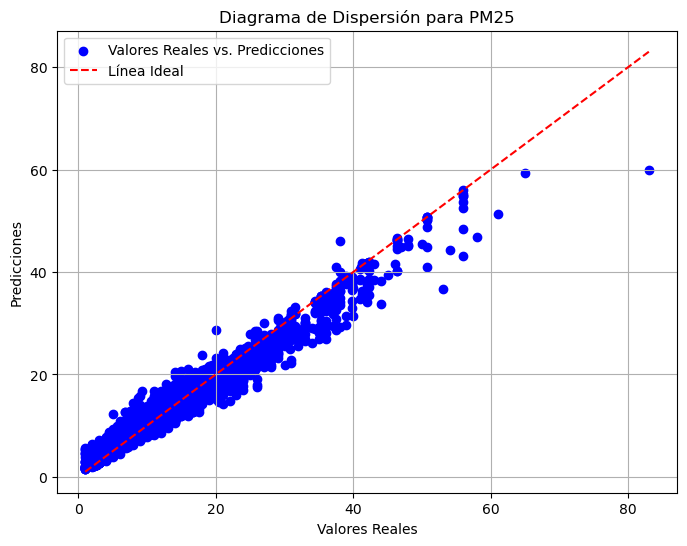

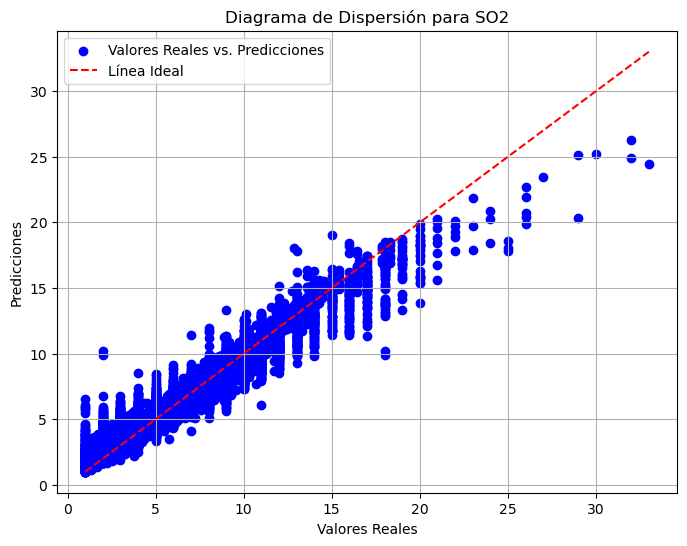

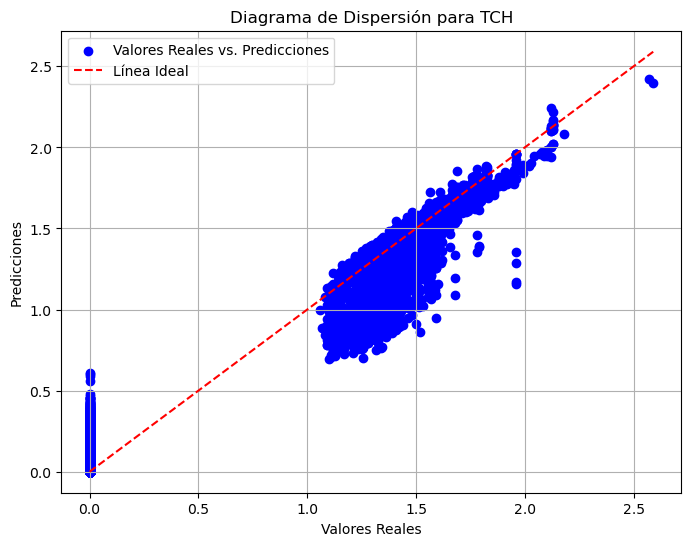

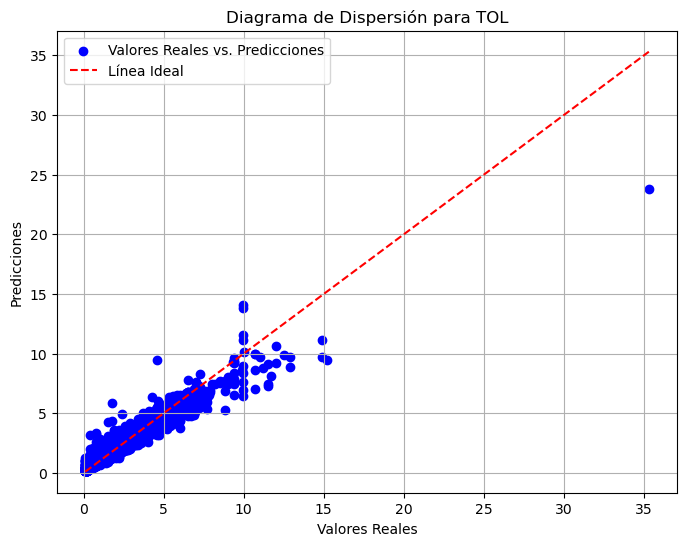

In [36]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Diccionario para almacenar las predicciones y los valores reales
predicciones_vs_reales = {}

# Itera sobre cada variable objetivo
for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    rf_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = rf_model.predict(X)  # Realiza predicciones
    
    # Almacena las predicciones y los valores reales en el diccionario
    predicciones_vs_reales[variable_objetivo] = {
        'y_actual': y_actual,
        'y_pred': y_pred
    }

    # Calcula el Error Absoluto Mediano (MAE) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)

    # Imprime el resultado MAE para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

# Crea los diagramas de dispersión
for variable_objetivo, datos in predicciones_vs_reales.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(datos['y_actual'], datos['y_pred'], c='blue', marker='o', label='Valores Reales vs. Predicciones')
    plt.plot([min(datos['y_actual']), max(datos['y_actual'])], [min(datos['y_actual']), max(datos['y_actual'])], linestyle='--', color='red', label='Línea Ideal')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Diagrama de Dispersión para {variable_objetivo}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

In [22]:
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    gb_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = gb_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.055902658363509994
MedAE para CH4: 0.22808785635977857
MedAE para CO: 0.03997450282236997
MedAE para EBE: 0.11661057705429065
MedAE para NMHC: 0.022363382233048144
MedAE para NO: 2.7737583713981646
MedAE para NO2: 5.575657459784384
MedAE para NOX: 9.887146865140913
MedAE para O3: 5.88173619017256
MedAE para PM10: 3.297562488945365
MedAE para PM25: 1.608016694846837
MedAE para SO2: 1.2059864172413928
MedAE para TCH: 0.25014500135084095
MedAE para TOL: 0.3673910529278688


In [14]:
from sklearn.ensemble import BaggingRegressor

In [15]:
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=100, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    bagging_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = bagging_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.015250000000000152
MedAE para CH4: 0.0125999999999995
MedAE para CO: 0.011916666666666714
MedAE para EBE: 0.02300000000000013
MedAE para NMHC: 0.0015500000000001901
MedAE para NO: 0.9000000000000004
MedAE para NO2: 1.7700000000000031
MedAE para NOX: 3.0799999999999983
MedAE para O3: 1.4672111111110269
MedAE para PM10: 0.6933333333333351
MedAE para PM25: 0.2524999999999995
MedAE para SO2: 0.3383333333333338
MedAE para TCH: 0.01395
MedAE para TOL: 0.0774999999999979


In [1]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import median_absolute_error

# Crear el modelo de BaggingRegressor con el estimador base deseado y otros parámetros
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=100, random_state=42)

# Entrenar el modelo para cada variable objetivo y calcular la importancia de características
importancia_caracteristicas = {}

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    bagging_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    
    # Obtener la importancia de características
    importancias = bagging_model.estimators_[0].feature_importances_  # Usamos el primer estimador del BaggingRegressor

    # Asociar las importancias con los nombres de las características
    caracteristicas = X.columns  # Asegúrate de reemplazarlo con el nombre de tus características
    importancia_caracteristicas[variable_objetivo] = dict(zip(caracteristicas, importancias))

# Imprimir las características más importantes para cada variable objetivo
for variable_objetivo, importancias in importancia_caracteristicas.items():
    print(f'Variable objetivo: {variable_objetivo}')
    importancias_ordenadas = sorted(importancias.items(), key=lambda x: x[1], reverse=True)
    for caracteristica, importancia in importancias_ordenadas:
        print(f'{caracteristica}: {importancia}')
    print()

NameError: name 'y' is not defined

In [23]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 3.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import graphviz

In [17]:
# Crear el modelo de BaggingRegressor con el estimador base deseado y otros parámetros
base_estimator = DecisionTreeRegressor(max_depth=5)  # Puedes ajustar la profundidad máxima según tus necesidades
bagging_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=100, random_state=42)

# Entrenar el modelo para cada variable objetivo y calcular la importancia de características
importancia_caracteristicas = {}

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    bagging_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    
    # Obtener el árbol de decisión base (el primer estimador del BaggingRegressor)
    arbol_base = bagging_model.estimators_[0]

    # Visualizar el árbol de decisión
    dot_data = export_graphviz(arbol_base, out_file=None, filled=True, rounded=True, special_characters=True)
    graph = graphviz.Source(dot_data)
    graph.render(f"arbol_{variable_objetivo}")  # Esto guarda el árbol en un archivo con el nombre de la variable objetivo
    graph.view(f"arbol_{variable_objetivo}")

    # Obtener la importancia de características
    importancias = arbol_base.feature_importances_

    # Asociar las importancias con los nombres de las características
    caracteristicas = X.columns  # Asegúrate de reemplazarlo con el nombre de tus características
    importancia_caracteristicas[variable_objetivo] = dict(zip(caracteristicas, importancias))

# Imprimir las características más importantes para cada variable objetivo
for variable_objetivo, importancias in importancia_caracteristicas.items():
    print(f'Variable objetivo: {variable_objetivo}')
    importancias_ordenadas = sorted(importancias.items(), key=lambda x: x[1], reverse=True)
    for caracteristica, importancia in importancias_ordenadas:
        print(f'{caracteristica}: {importancia}')
    print()

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

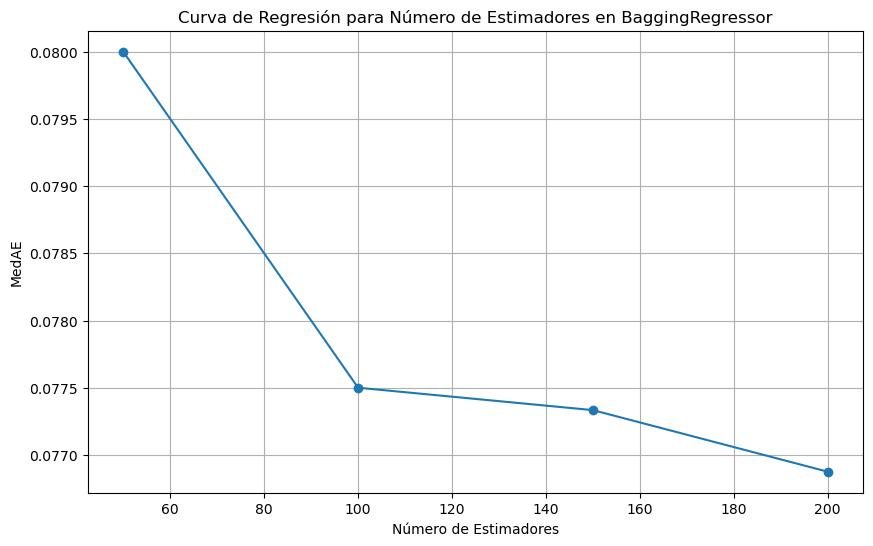

In [30]:
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import median_absolute_error

# Valores de número de estimadores que deseas probar
num_estimadores = [50, 100, 150, 200]  # Reemplaza esto con tus valores

# Lista para almacenar los resultados de MedAE para cada número de estimadores
mae_scores = []

for n_estimators in num_estimadores:
    # Crea un modelo BaggingRegressor con el número de estimadores actual
    bagging_model = BaggingRegressor(n_estimators=n_estimators, random_state=42)
    
    # Entrena el modelo para una variable objetivo (puedes adaptar esto a tus datos)
    y_actual = y[variable_objetivo]  # Reemplaza 'variable_objetivo' con el nombre de tu variable objetivo actual
    bagging_model.fit(X, y_actual)  # Entrena el modelo
    
    # Realizar predicciones
    y_pred = bagging_model.predict(X)
    
    # Calcular el MedAE
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores.append(mae)

# Crear la curva de regresión
plt.figure(figsize=(10, 6))
plt.plot(num_estimadores, mae_scores, marker='o', linestyle='-')
plt.title('Curva de Regresión para Número de Estimadores en BaggingRegressor')
plt.xlabel('Número de Estimadores')
plt.ylabel('MedAE')
plt.grid(True)

# Mostrar la curva de regresión
plt.show()

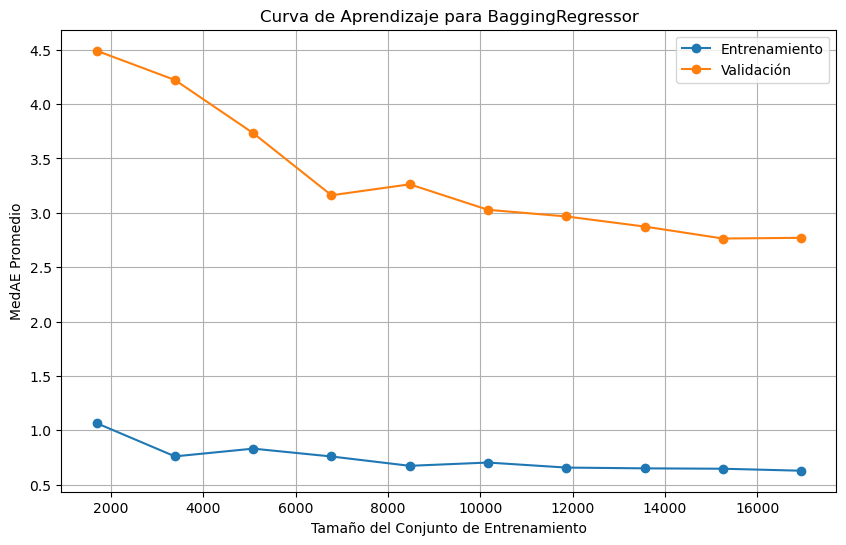

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import median_absolute_error
from sklearn.model_selection import learning_curve

# Define el modelo BaggingRegressor
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=100, random_state=42)

# Define los tamaños de conjunto de entrenamiento que deseas probar
tamaños_entrenamiento = np.linspace(0.1, 1.0, 10)  # Aquí puedes ajustar los tamaños deseados

# Crea una función para calcular el MedAE
def calcular_medae(modelo, X, y):
    y_pred = modelo.predict(X)
    return median_absolute_error(y, y_pred)

# Calcula las curvas de aprendizaje
train_sizes, train_scores, val_scores = learning_curve(
    bagging_model, X, y, train_sizes=tamaños_entrenamiento, cv=5, scoring=calcular_medae)

# Calcula el MedAE promedio en entrenamiento y validación para cada tamaño de conjunto de entrenamiento
train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)

# Crea la curva de aprendizaje
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, marker='o', label='Entrenamiento')
plt.plot(train_sizes, val_scores_mean, marker='o', label='Validación')
plt.title('Curva de Aprendizaje para BaggingRegressor')
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('MedAE Promedio')
plt.legend()
plt.grid(True)

# Muestra la curva de aprendizaje
plt.show()

MedAE para BEN: 0.015250000000000152
MedAE para CH4: 0.0125999999999995
MedAE para CO: 0.011916666666666714
MedAE para EBE: 0.02300000000000013
MedAE para NMHC: 0.0015500000000001901
MedAE para NO: 0.9000000000000004
MedAE para NO2: 1.7700000000000031
MedAE para NOX: 3.0799999999999983
MedAE para O3: 1.4672111111110269
MedAE para PM10: 0.6933333333333351
MedAE para PM25: 0.2524999999999995
MedAE para SO2: 0.3383333333333338
MedAE para TCH: 0.01395
MedAE para TOL: 0.0774999999999979


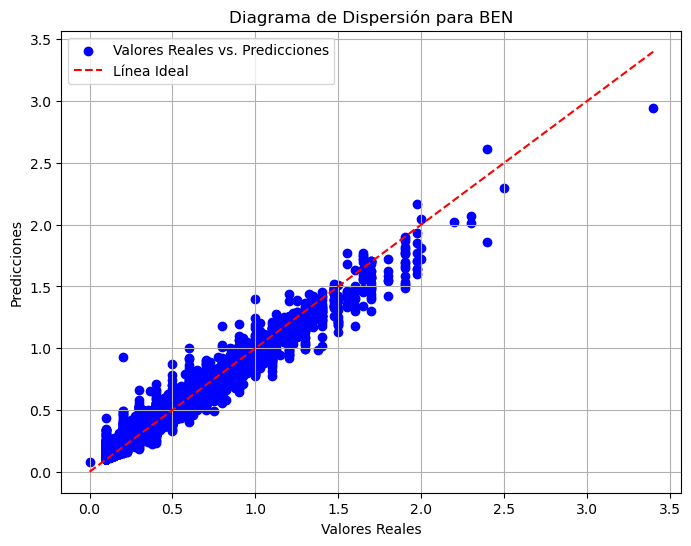

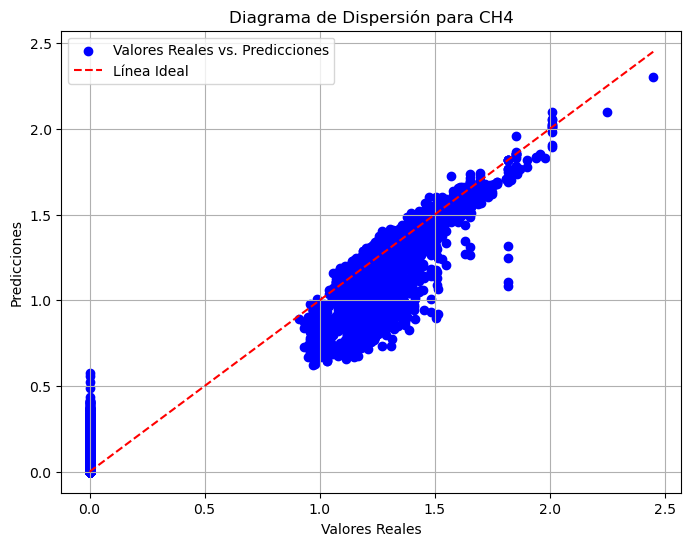

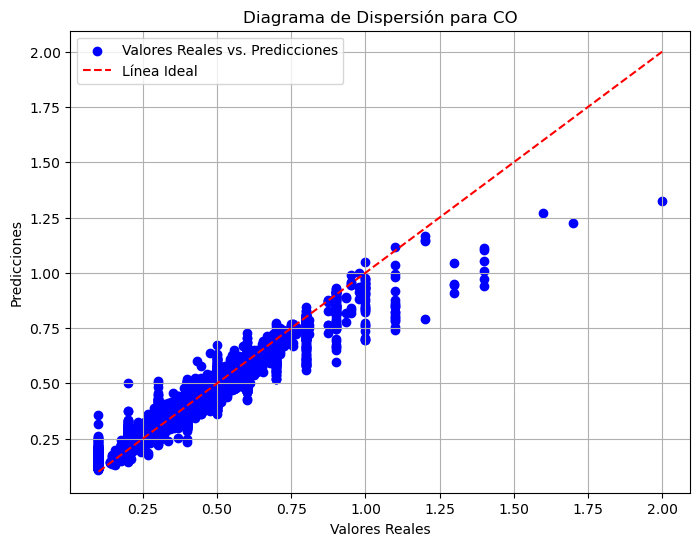

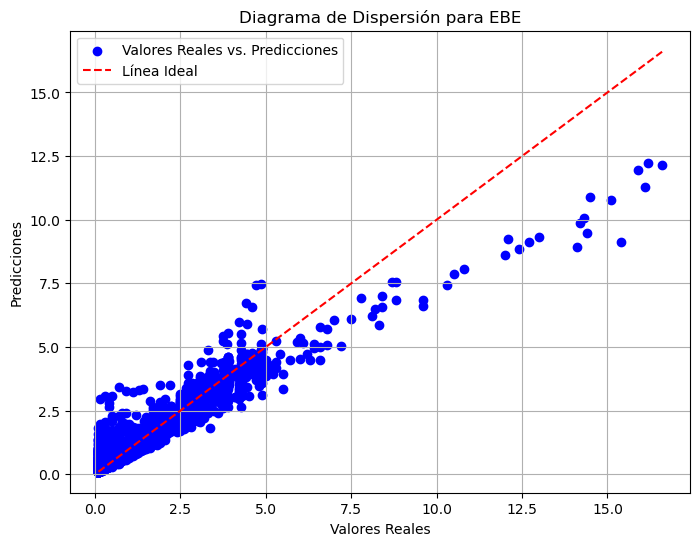

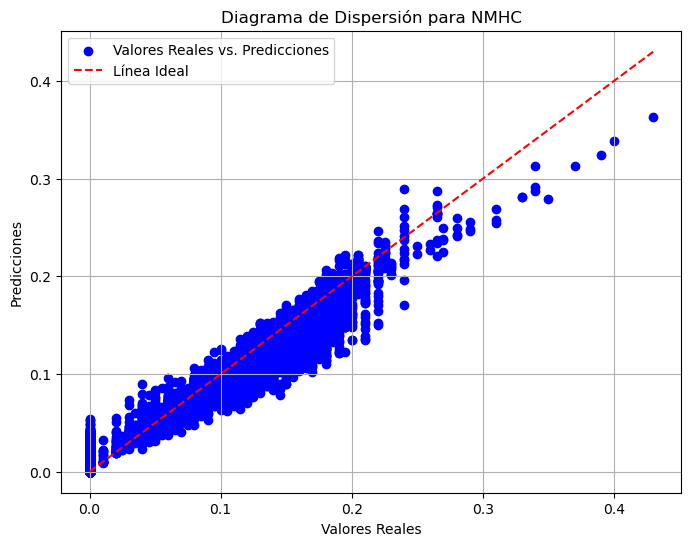

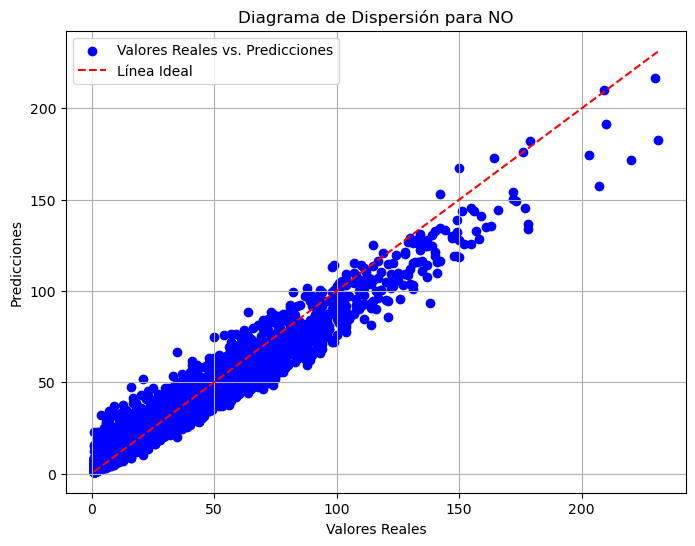

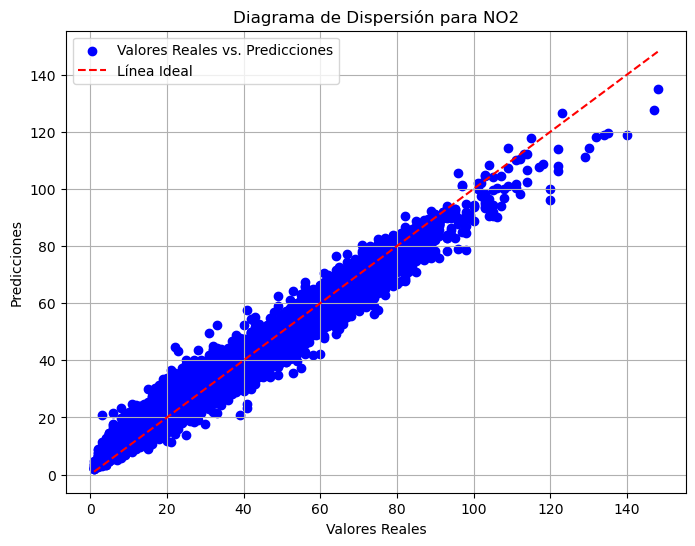

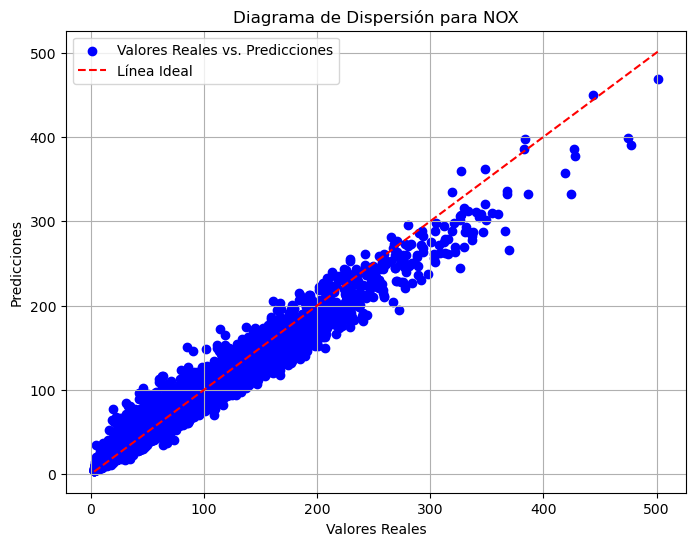

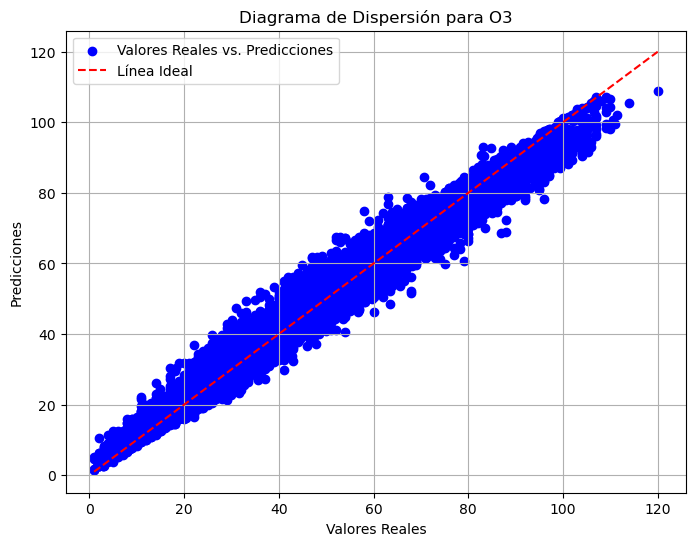

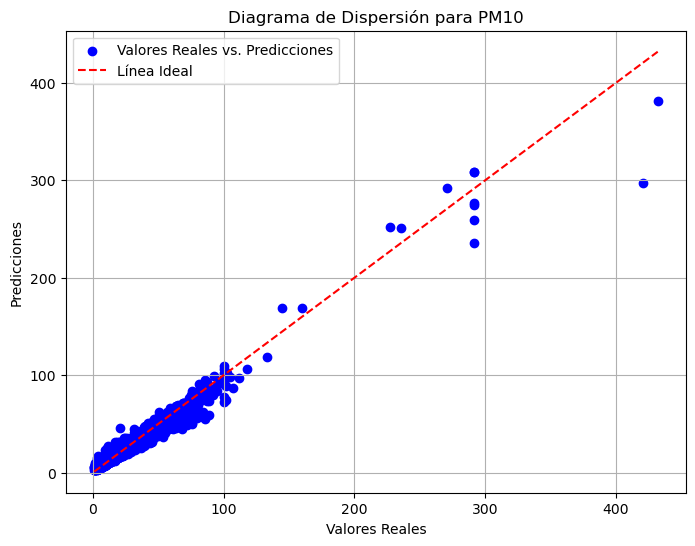

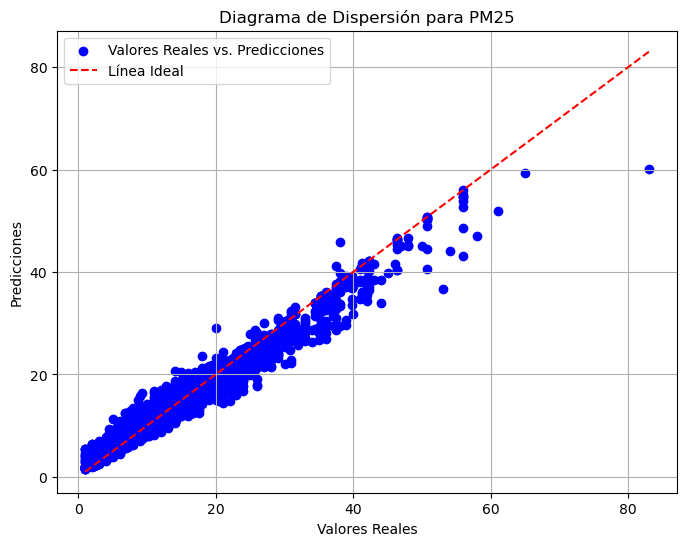

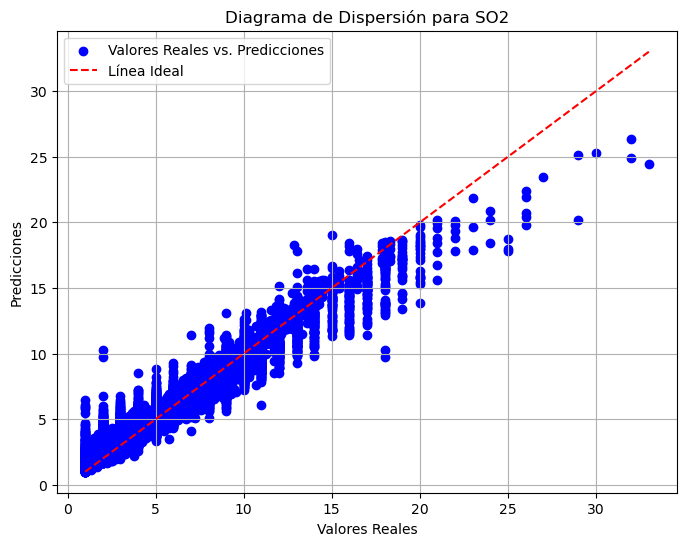

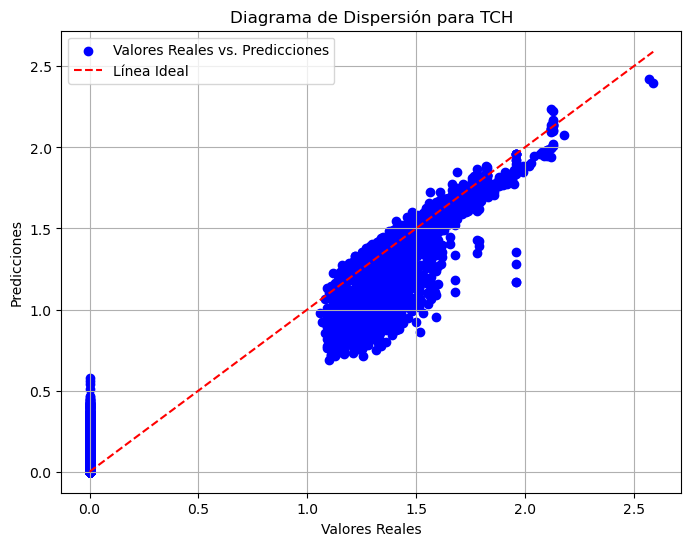

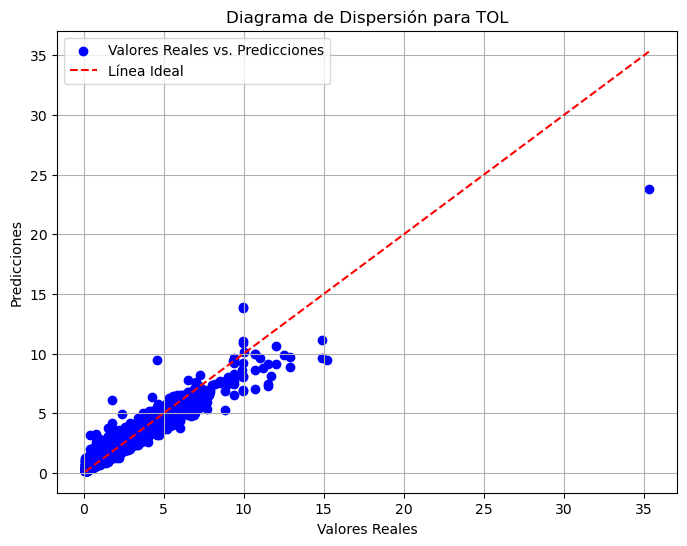

In [37]:
bagging_model = BaggingRegressor(base_estimator=None, n_estimators=100, random_state=42)

# Diccionario para almacenar las predicciones y los valores reales
predicciones_vs_reales = {}

# Itera sobre cada variable objetivo
for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    bagging_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = bagging_model.predict(X)  # Realiza predicciones
    
    # Almacena las predicciones y los valores reales en el diccionario
    predicciones_vs_reales[variable_objetivo] = {
        'y_actual': y_actual,
        'y_pred': y_pred
    }

    # Calcula el Error Absoluto Mediano (MAE) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)

    # Imprime el resultado MAE para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

# Crea los diagramas de dispersión
for variable_objetivo, datos in predicciones_vs_reales.items():
    plt.figure(figsize=(8, 6))
    plt.scatter(datos['y_actual'], datos['y_pred'], c='blue', marker='o', label='Valores Reales vs. Predicciones')
    plt.plot([min(datos['y_actual']), max(datos['y_actual'])], [min(datos['y_actual']), max(datos['y_actual'])], linestyle='--', color='red', label='Línea Ideal')
    plt.xlabel('Valores Reales')
    plt.ylabel('Predicciones')
    plt.title(f'Diagrama de Dispersión para {variable_objetivo}')
    plt.legend()
    plt.grid(True)
    plt.show()

In [25]:
from sklearn.neural_network import MLPRegressor

In [26]:
mlp_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=1000, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    mlp_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = mlp_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.16169808463525975
MedAE para CH4: 0.6337585893760982
MedAE para CO: 0.25230043821848924
MedAE para EBE: 0.4774577023923341
MedAE para NMHC: 0.5347349473197898
MedAE para NO: 3.2787502552289265
MedAE para NO2: 6.935570065195936
MedAE para NOX: 12.299062254510865
MedAE para O3: 7.346627856941577
MedAE para PM10: 4.746468022145919
MedAE para PM25: 2.8240890075968963
MedAE para SO2: 1.6182583906145709
MedAE para TCH: 0.6343395518774715
MedAE para TOL: 0.906218840257592


In [27]:
from sklearn.linear_model import Ridge

In [28]:
modelo_ridge = Ridge(alpha=1.0, solver='auto')

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_ridge.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_ridge.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.10007587959540559
MedAE para CH4: 0.5046064586952546
MedAE para CO: 0.05424438661145192
MedAE para EBE: 0.2461921051915386
MedAE para NMHC: 0.04241025769289447
MedAE para NO: 6.116625435043943
MedAE para NO2: 7.998257272296371
MedAE para NOX: 16.410577134372943
MedAE para O3: 8.830447287823475
MedAE para PM10: 5.288280457129446
MedAE para PM25: 2.762152004420784
MedAE para SO2: 1.9834381635758973
MedAE para TCH: 0.5502499905407565
MedAE para TOL: 0.5951716007533101


In [29]:
from sklearn.linear_model import Lasso

In [30]:
modelo_lasso = Lasso(alpha=1.0)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    modelo_lasso.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = modelo_lasso.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.11989293306730592
MedAE para CH4: 0.5344781317394367
MedAE para CO: 0.06677764233307959
MedAE para EBE: 0.2745137582728884
MedAE para NMHC: 0.0457049133902865
MedAE para NO: 5.863697716206275
MedAE para NO2: 8.064587108158378
MedAE para NOX: 16.181015939247345
MedAE para O3: 9.123703027894862
MedAE para PM10: 5.435407685298969
MedAE para PM25: 2.9069411636043867
MedAE para SO2: 1.9463377027814328
MedAE para TCH: 0.5721526621866964
MedAE para TOL: 0.6518526165290439


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
import numpy as np

# Supongamos que tienes un modelo de regresión de árbol previamente definido
modelo_arbol = DecisionTreeRegressor(max_depth=15)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores)
puntajes = cross_val_score(modelo_arbol, X, y, cv=10, scoring='neg_median_absolute_error')

# Convierte los puntajes negativos a Median Absolute Error (MedAE)
medae_scores = -puntajes

# Imprime los puntajes MedAE para cada pliegue
print("Puntajes MedAE para cada pliegue:", medae_scores)

# Calcula el promedio de los puntajes MedAE
promedio_medae = np.mean(medae_scores)
print("MedAE promedio:", promedio_medae)

Puntajes MedAE para cada pliegue: [2.73749675 3.0333524  2.08023943 2.08034082 1.95596176 1.91196482
 2.25196582 1.79632011 2.41377501 2.12477898]
MedAE promedio: 2.238619589650947


In [35]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes = cross_val_score(rf_model, X, y, cv=5, scoring='neg_median_absolute_error')

# Convierte los puntajes negativos a Median Absolute Error (MedAE)
medae_scores = -puntajes

# Imprime los puntajes MedAE para cada pliegue
print("Puntajes MedAE para cada pliegue:", medae_scores)

# Calcula el promedio de los puntajes MedAE
promedio_medae = np.mean(medae_scores)
print("MedAE promedio:", promedio_medae)

Puntajes MedAE para cada pliegue: [3.61100979 2.82994749 2.35845213 2.28648024 2.77129345]
MedAE promedio: 2.7714366187384036


In [20]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
bagging_model = BaggingRegressor(base_estimator=modelo_arbol, n_estimators=100, random_state=42) # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(bagging_model, X, y, cv=5, scoring='neg_median_absolute_error')

# Convierte los puntajes negativos a Median Absolute Error (MedAE)
medae_scores = -puntajes

# Imprime los puntajes MedAE para cada pliegue
print("Puntajes MedAE para cada pliegue:", medae_scores)

# Calcula el promedio de los puntajes MedAE
promedio_medae = np.mean(medae_scores)
print("MedAE promedio:", promedio_medae)

Puntajes MedAE para cada pliegue: [2.73749675 3.0333524  2.08023943 2.08034082 1.95596176 1.91196482
 2.25196582 1.79632011 2.41377501 2.12477898]
MedAE promedio: 2.238619589650947


### RF GRID SEARCH

In [28]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5,10,15],
    'random_state': [42]
}

In [33]:
# Búsqueda de meta-parámetros:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)

In [34]:
# Ajustar el modelo a los datos
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [50, 100, 150], 'random_state': [42]})

In [35]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'max_depth': 15, 'n_estimators': 150, 'random_state': 42}


In [36]:
best_model = grid_search.best_estimator_
best_model.fit(X, y)

RandomForestRegressor(max_depth=15, n_estimators=150, random_state=42)

In [37]:
y_pred = best_model.predict(X)

In [39]:
MedAE = median_absolute_error(y, y_pred)
print(f"MedAE en el conjunto de entrenamiento: {MedAE}")

MedAE en el conjunto de entrenamiento: 1.1388967474419458


### BAGGING REGRESSOR GRID SEARCH

In [46]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'base_estimator': [modelo_arbol, modelo_lineal_multiple]
}

In [47]:
# Búsqueda de meta-parámetros:
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, cv=5)

In [48]:
# Ajustar el modelo a los datos
grid_search.fit(X,y)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(n_estimators=100, random_state=42),
             param_grid={'base_estimator': [DecisionTreeRegressor(max_depth=15),
                                            LinearRegression()],
                         'n_estimators': [50, 100, 150]})

In [49]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'base_estimator': DecisionTreeRegressor(max_depth=15), 'n_estimators': 150}


In [50]:
best_model = grid_search.best_estimator_
best_model.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=15),
                 n_estimators=150, random_state=42)

In [51]:
y_pred = best_model.predict(X)

In [52]:
MedAE = median_absolute_error(y, y_pred)
print(f"MedAE en el conjunto de entrenamiento: {MedAE}")

MedAE en el conjunto de entrenamiento: 1.1371999845593181


### DTR GRID SEARCH

In [53]:
param_grid = {
    'max_depth': [5,10,15]
}

In [54]:
# Búsqueda de meta-parámetros:
grid_search = GridSearchCV(estimator=modelo_arbol, param_grid=param_grid, cv=5)

In [55]:
# Ajustar el modelo a los datos
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(max_depth=15),
             param_grid={'max_depth': [5, 10, 15]})

In [56]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

Mejores hiperparámetros encontrados:
{'max_depth': 15}


In [57]:
best_model = grid_search.best_estimator_
best_model.fit(X, y)

DecisionTreeRegressor(max_depth=15)

In [58]:
y_pred = best_model.predict(X)

In [59]:
MedAE = median_absolute_error(y, y_pred)
print(f"MedAE en el conjunto de entrenamiento: {MedAE}")

MedAE en el conjunto de entrenamiento: 0.7074906250378937


### DESPUES DEL GRID SEARCH

#### RF

In [61]:
rf_model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    rf_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = rf_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.025180172353693075
MedAE para CH4: 0.08047923143619745
MedAE para CO: 0.023187441214868154
MedAE para EBE: 0.05053404762765437
MedAE para NMHC: 0.008535918368659851
MedAE para NO: 1.646178823761527
MedAE para NO2: 2.8858703824683154
MedAE para NOX: 5.24901983551635
MedAE para O3: 2.427327482229046
MedAE para PM10: 1.636771379051213
MedAE para PM25: 0.6682430931087016
MedAE para SO2: 0.6728137099092146
MedAE para TCH: 0.09075637613842816
MedAE para TOL: 0.14817853428072292


In [62]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
rf_model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes = cross_val_score(rf_model, X, y, cv=5, scoring='neg_median_absolute_error')

# Convierte los puntajes negativos a Median Absolute Error (MedAE)
medae_scores = -puntajes

# Imprime los puntajes MedAE para cada pliegue
print("Puntajes MedAE para cada pliegue:", medae_scores)

# Calcula el promedio de los puntajes MedAE
promedio_medae = np.mean(medae_scores)
print("MedAE promedio:", promedio_medae)

Puntajes MedAE para cada pliegue: [3.61456576 2.85615585 2.38396418 2.34711605 2.75694177]
MedAE promedio: 2.791748721495931


BR

In [63]:
bagging_model = BaggingRegressor(base_estimator=modelo_arbol, n_estimators=150, random_state=42)

# Entrenar el modelo para cada variable objetivo
mae_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    bagging_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = bagging_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    mae = median_absolute_error(y_actual, y_pred)
    mae_scores[variable_objetivo] = mae

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'MedAE para {variable_objetivo}: {mae}')

MedAE para BEN: 0.0252310779252298
MedAE para CH4: 0.08072322821417283
MedAE para CO: 0.023129935590654738
MedAE para EBE: 0.05063924020588301
MedAE para NMHC: 0.008524704132206476
MedAE para NO: 1.6449591068483973
MedAE para NO2: 2.882861676429073
MedAE para NOX: 5.25218743259315
MedAE para O3: 2.418076647880355
MedAE para PM10: 1.630453922834441
MedAE para PM25: 0.6698432762462998
MedAE para SO2: 0.6753146060066664
MedAE para TCH: 0.09075637613842816
MedAE para TOL: 0.14833315643379752


In [64]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
bagging_model = BaggingRegressor(base_estimator=modelo_arbol, n_estimators=150, random_state=42) # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(bagging_model, X, y, cv=5, scoring='neg_median_absolute_error')

# Convierte los puntajes negativos a Median Absolute Error (MedAE)
medae_scores = -puntajes

# Imprime los puntajes MedAE para cada pliegue
print("Puntajes MedAE para cada pliegue:", medae_scores)

# Calcula el promedio de los puntajes MedAE
promedio_medae = np.mean(medae_scores)
print("MedAE promedio:", promedio_medae)

Puntajes MedAE para cada pliegue: [3.61456576 2.85615585 2.38396418 2.34711605 2.75694177]
MedAE promedio: 2.791748721495931


DTR

El mismo

## R2

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
rf_model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)

# Entrenar el modelo para cada variable objetivo
r2_scores = {}  # Un diccionario para almacenar los resultados R^2

for variable_objetivo in y.columns:
    y_actual = y[variable_objetivo]  # Selecciona la variable objetivo actual
    rf_model.fit(X, y_actual)  # Entrena el modelo para la variable objetivo actual
    y_pred = rf_model.predict(X)  # Realiza predicciones
    
    # Calcula el coeficiente de determinación (R^2) para la variable objetivo actual
    r2 = r2_score(y_actual, y_pred)
    mae_scores[variable_objetivo] = r2

    # Imprime el resultado R^2 para la variable objetivo actual
    print(f'r2 para {variable_objetivo}: {r2}')

r2 para BEN: 0.9393922967935003
r2 para CH4: 0.8980301633675563
r2 para CO: 0.855153998157742
r2 para EBE: 0.8802197864464707
r2 para NMHC: 0.8762527118867967
r2 para NO: 0.9342243516856851
r2 para NO2: 0.9214096096001624
r2 para NOX: 0.9359252649461984
r2 para O3: 0.9562665332950453
r2 para PM10: 0.9136995792968062
r2 para PM25: 0.9178204701365983
r2 para SO2: 0.8196781914546278
r2 para TCH: 0.8926471963152282
r2 para TOL: 0.9091741975474048


In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# Supongamos que tienes un modelo de regresión de árbol previamente definido
rf_model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Imprime los puntajes R² para cada pliegue
print("Puntajes R² para cada pliegue:", puntajes_r2)

# Calcula el promedio de los puntajes R²
promedio_r2 = np.mean(puntajes_r2)
print("R² promedio:", promedio_r2)

Puntajes R² para cada pliegue: [-6.3528238  -7.68016568  0.40704179  0.29083917 -0.31666507]
R² promedio: -2.730354718420432


In [34]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
bagging_model = BaggingRegressor(base_estimator=modelo_arbol, n_estimators=150, random_state=42) # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(bagging_model, X, y, cv=5, scoring='neg_median_absolute_error')

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Imprime los puntajes R² para cada pliegue
print("Puntajes R² para cada pliegue:", puntajes_r2)

# Calcula el promedio de los puntajes R²
promedio_r2 = np.mean(puntajes_r2)
print("R² promedio:", promedio_r2)

Puntajes R² para cada pliegue: [-6.3528238  -7.68016568  0.40704179  0.29083917 -0.31666507]
R² promedio: -2.730354718420432


In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
import numpy as np

# Supongamos que tienes un modelo de regresión de árbol previamente definido
modelo_arbol = DecisionTreeRegressor(max_depth=15)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores)
puntajes = cross_val_score(modelo_arbol, X, y, cv=10, scoring='neg_median_absolute_error')

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Imprime los puntajes R² para cada pliegue
print("Puntajes R² para cada pliegue:", puntajes_r2)

# Calcula el promedio de los puntajes R²
promedio_r2 = np.mean(puntajes_r2)
print("R² promedio:", promedio_r2)

Puntajes R² para cada pliegue: [-6.3528238  -7.68016568  0.40704179  0.29083917 -0.31666507]
R² promedio: -2.730354718420432


In [36]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import numpy as np

# Supongamos que tienes un modelo de regresión de árbol previamente definido
modelo_arbol = DecisionTreeRegressor(max_depth=15)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores)
puntajes = cross_val_score(modelo_arbol, X, y, cv=10, scoring='neg_mean_absolute_error')

# Convierte los puntajes negativos a MAE (Mean Absolute Error)
mae_scores = -puntajes

# Imprime los puntajes MAE para cada pliegue
print("Puntajes MAE para cada pliegue:", mae_scores)

# Calcula el promedio de los puntajes MAE
promedio_mae = np.mean(mae_scores)
print("MAE promedio:", promedio_mae)

Puntajes MAE para cada pliegue: [4.18688827 5.20358531 3.84551828 3.7427153  3.37939024 3.29980657
 3.6763324  3.11104575 4.11953498 3.47699427]
MAE promedio: 3.804181136353413


In [37]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
bagging_model = BaggingRegressor(base_estimator=modelo_arbol, n_estimators=150, random_state=42)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores)
puntajes = cross_val_score(bagging_model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Convierte los puntajes negativos a MAE (Mean Absolute Error)
mae_scores = -puntajes

# Imprime los puntajes MAE para cada pliegue
print("Puntajes MAE para cada pliegue:", mae_scores)

# Calcula el promedio de los puntajes MAE
promedio_mae = np.mean(mae_scores)
print("MAE promedio:", promedio_mae)

Puntajes MAE para cada pliegue: [3.63021226 4.12009999 3.2951917  2.97960538 2.90136779 2.60739428
 3.10646711 2.56168641 3.25386346 2.85075481]
MAE promedio: 3.1306643192343957


In [38]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
rf_model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)  # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores)
puntajes = cross_val_score(rf_model, X, y, cv=10, scoring='neg_mean_absolute_error')

# Convierte los puntajes negativos a MAE (Mean Absolute Error)
mae_scores = -puntajes

# Imprime los puntajes MAE para cada pliegue
print("Puntajes MAE para cada pliegue:", mae_scores)

# Calcula el promedio de los puntajes MAE
promedio_mae = np.mean(mae_scores)
print("MAE promedio:", promedio_mae)

Puntajes MAE para cada pliegue: [3.62871571 4.12505456 3.29897656 2.97754049 2.90514584 2.6070705
 3.10613848 2.55956405 3.25486773 2.85005669]
MAE promedio: 3.1313130608964905


In [ ]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
bagging_model = BaggingRegressor(base_estimator=modelo_arbol, n_estimators=150, random_state=42) # Puedes ajustar la profundidad máxima según tus necesidades

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(bagging_model, X, y, cv=5, scoring='neg_median_absolute_error')

# Realiza la validación cruzada y obtiene los puntajes de rendimiento (scores) de R²
puntajes_r2 = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Imprime los puntajes R² para cada pliegue
print("Puntajes R² para cada pliegue:", puntajes_r2)

# Calcula el promedio de los puntajes R²
promedio_r2 = np.mean(puntajes_r2)
print("R² promedio:", promedio_r2)

## PRUEBA INDEPENDIENTE PARA VER SI GENERALIZA BIEN LOS MODELOS

In [39]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [45]:
# Supongamos que tienes un modelo de regresión de bosque aleatorio previamente definido
rf_model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
rf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = rf_model.predict(X_test)

# Calcular métricas de rendimiento en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

# Imprimir las métricas de rendimiento
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Median Absolute Error (MedAE):", medae)

Mean Absolute Error (MAE): 2.8637700803616966
Mean Squared Error (MSE): 57.54523667252301
R-squared (R²): 0.6872340922430763
Median Absolute Error (MedAE): 1.7922132974328604


In [44]:
# Supongamos que tienes un modelo de regresión de bosque aleatorio previamente definido
bagging_model = BaggingRegressor(base_estimator=modelo_arbol, n_estimators=150, random_state=42)

# Entrenar el modelo en el conjunto de entrenamiento
bagging_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = bagging_model.predict(X_test)

# Calcular métricas de rendimiento en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

# Imprimir las métricas de rendimiento
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Median Absolute Error (MedAE):", medae)

Mean Absolute Error (MAE): 2.863421159594169
Mean Squared Error (MSE): 57.63269880303998
R-squared (R²): 0.6875287950588992
Median Absolute Error (MedAE): 1.7884946738741088


In [43]:
# Supongamos que tienes un modelo de regresión de bosque aleatorio previamente definido
modelo_arbol = DecisionTreeRegressor(max_depth=15)

# Entrenar el modelo en el conjunto de entrenamiento
modelo_arbol.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = modelo_arbol.predict(X_test)

# Calcular métricas de rendimiento en el conjunto de prueba
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

# Imprimir las métricas de rendimiento
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)
print("Median Absolute Error (MedAE):", medae)

Mean Absolute Error (MAE): 3.560777546250249
Mean Squared Error (MSE): 105.07617073110224
R-squared (R²): 0.4764932168846121
Median Absolute Error (MedAE): 2.0094498263541953


## GENERALIZAR PERO CON PROMEDIO

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.model_selection import cross_val_predict
import numpy as np

# Supongamos que tienes un modelo de regresión de árbol previamente definido
modelo_arbol = DecisionTreeRegressor(max_depth=15)

# Realiza la validación cruzada y obtiene las predicciones para cada pliegue
y_pred_cv = cross_val_predict(modelo_arbol, X, y, cv=5)

# Calcula las métricas promedio en todos los pliegues
mae_cv = mean_absolute_error(y, y_pred_cv)
mse_cv = mean_squared_error(y, y_pred_cv)
r2_cv = r2_score(y, y_pred_cv)
medae_cv = median_absolute_error(y, y_pred_cv)

# Imprime las métricas promedio
print("Mean Absolute Error (MAE) promedio:", mae_cv)
print("Mean Squared Error (MSE) promedio:", mse_cv)
print("R-squared (R²) promedio:", r2_cv)
print("Median Absolute Error (MedAE) promedio:", medae_cv)

Mean Absolute Error (MAE) promedio: 5.237881313093891
Mean Squared Error (MSE) promedio: 200.7729517971405
R-squared (R²) promedio: 0.018767930543964577
Median Absolute Error (MedAE) promedio: 3.225362603602234


In [47]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
bagging_model = BaggingRegressor(base_estimator=modelo_arbol, n_estimators=150, random_state=42)

# Realiza la validación cruzada y obtiene las predicciones para cada pliegue
y_pred_cv = cross_val_predict(bagging_model, X, y, cv=5)

# Calcula las métricas promedio en todos los pliegues
mae_cv = mean_absolute_error(y, y_pred_cv)
mse_cv = mean_squared_error(y, y_pred_cv)
r2_cv = r2_score(y, y_pred_cv)
medae_cv = median_absolute_error(y, y_pred_cv)

# Imprime las métricas promedio
print("Mean Absolute Error (MAE) promedio:", mae_cv)
print("Mean Squared Error (MSE) promedio:", mse_cv)
print("R-squared (R²) promedio:", r2_cv)
print("Median Absolute Error (MedAE) promedio:", medae_cv)

Mean Absolute Error (MAE) promedio: 4.154896307729332
Mean Squared Error (MSE) promedio: 118.21165244319806
R-squared (R²) promedio: 0.32704837264804
Median Absolute Error (MedAE) promedio: 2.71311652291448


In [48]:
# Supongamos que tienes un modelo de regresión de árbol previamente definido
rf_model = RandomForestRegressor(n_estimators=150, max_depth=15, random_state=42)

# Realiza la validación cruzada y obtiene las predicciones para cada pliegue
y_pred_cv = cross_val_predict(rf_model, X, y, cv=5)

# Calcula las métricas promedio en todos los pliegues
mae_cv = mean_absolute_error(y, y_pred_cv)
mse_cv = mean_squared_error(y, y_pred_cv)
r2_cv = r2_score(y, y_pred_cv)
medae_cv = median_absolute_error(y, y_pred_cv)

# Imprime las métricas promedio
print("Mean Absolute Error (MAE) promedio:", mae_cv)
print("Mean Squared Error (MSE) promedio:", mse_cv)
print("R-squared (R²) promedio:", r2_cv)
print("Median Absolute Error (MedAE) promedio:", medae_cv)

Mean Absolute Error (MAE) promedio: 4.153583493496691
Mean Squared Error (MSE) promedio: 117.97000083771488
R-squared (R²) promedio: 0.3277419163041193
Median Absolute Error (MedAE) promedio: 2.712320728238543
